In [ ]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = '/content/drive/My Drive/Jobchange.csv'
data = pd.read_csv(file)
data.head()

,Enrollee_id,City,City_development_index,Gender,Relevent_experience,Enrolled_university,Education_level,Major_discipline,Experience,Company_size,Company_type,Last_new_job,Training_hours,Target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [ ]:
df4 = data.copy()

In [ ]:
df4.shape

(19158, 14)

In [ ]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
City_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
Training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
Target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [ ]:
df4.isnull().sum()

,0
Enrollee_id,0
City,0
City_development_index,0
Gender,4508
Relevent_experience,0
Enrolled_university,386
Education_level,460
Major_discipline,2813
Experience,65
Company_size,5938


In [ ]:
df4.duplicated().sum()

np.int64(0)

In [ ]:
df4.nunique()

,0
Enrollee_id,19158
City,123
City_development_index,93
Gender,3
Relevent_experience,2
Enrolled_university,3
Education_level,5
Major_discipline,6
Experience,22
Company_size,8


In [ ]:
df4['Experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [ ]:
def bin(x):
  if x == '>20':
    return '>20'
  elif x in [str(i) for i in range(16,21)]:
    return '16-20'
  elif x in [str(i) for i in range(11,16)]:
    return '11-15'
  elif x in [str(i) for i in range(5,11)]:
    return '6-10'
  elif x in [str(i) for i in range(1,5)] + ['>1']:
    return '<6'
  else:
    return x

In [ ]:
df4['Experience'].apply(bin)

,Experience
0,>20
1,11-15
2,6-10
3,<1
4,>20
...,...
19153,11-15
19154,11-15
19155,>20
19156,<1


In [ ]:
df4['Experience'].nunique()

22

In [ ]:
df4.isnull().sum()

,0
Enrollee_id,0
City,0
City_development_index,0
Gender,4508
Relevent_experience,0
Enrolled_university,386
Education_level,460
Major_discipline,2813
Experience,65
Company_size,5938


In [ ]:
imputer_mode = SimpleImputer(strategy="most_frequent")
df4[["Enrolled_university","Education_level","Major_discipline","Experience","Company_type","Last_new_job","Company_size","Gender"]] = imputer_mode.fit_transform(
    df4[["Enrolled_university","Education_level","Major_discipline","Experience","Company_type","Last_new_job","Company_size","Gender"]])

In [ ]:
df4.head()

,Enrollee_id,City,City_development_index,Gender,Relevent_experience,Enrolled_university,Education_level,Major_discipline,Experience,Company_size,Company_type,Last_new_job,Training_hours,Target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [ ]:
df4.drop(['Enrollee_id'],axis=1,inplace=True)

In [ ]:
df4.drop(['City'],axis=1,inplace=True)

In [ ]:
df4

,City_development_index,Gender,Relevent_experience,Enrolled_university,Education_level,Major_discipline,Experience,Company_size,Company_type,Last_new_job,Training_hours,Target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0
3,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50-99,Pvt Ltd,1,42,1
19154,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,4,52,1
19155,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0
19156,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,<1,500-999,Pvt Ltd,2,97,0


In [ ]:
X = df4.drop('Target',axis=1)
y = df4['Target']

In [ ]:
X.head()

,City_development_index,Gender,Relevent_experience,Enrolled_university,Education_level,Major_discipline,Experience,Company_size,Company_type,Last_new_job,Training_hours
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83
3,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8


In [ ]:
# Encoding the categorical variables using one-hot encoding
X = pd.get_dummies(
    X,
    columns=["Last_new_job","Relevent_experience","Enrolled_university","Education_level","Major_discipline","Experience","Company_type","Company_size","Gender"],
    drop_first=True,
)

X = X.astype(float)

In [ ]:
X

,City_development_index,Training_hours,Last_new_job_2,Last_new_job_3,Last_new_job_4,Last_new_job_>4,Last_new_job_never,Relevent_experience_No relevent experience,Enrolled_university_Part time course,Enrolled_university_no_enrollment,...,Company_type_Pvt Ltd,Company_size_1000-4999,Company_size_10000+,Company_size_50-99,Company_size_500-999,Company_size_5000-9999,Company_size_<10,Company_size_Oct-49,Gender_Male,Gender_Other
0,0.920,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.776,47.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.624,83.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.789,52.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.767,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,42.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19154,0.920,52.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19155,0.920,44.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19156,0.802,97.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
transformer = StandardScaler()
X[['City_development_index','Training_hours']] = transformer.fit_transform(X[['City_development_index', 'Training_hours']])


In [ ]:
X

,City_development_index,Training_hours,Last_new_job_2,Last_new_job_3,Last_new_job_4,Last_new_job_>4,Last_new_job_never,Relevent_experience_No relevent experience,Enrolled_university_Part time course,Enrolled_university_no_enrollment,...,Company_type_Pvt Ltd,Company_size_1000-4999,Company_size_10000+,Company_size_50-99,Company_size_500-999,Company_size_5000-9999,Company_size_<10,Company_size_Oct-49,Gender_Male,Gender_Other
0,0.738919,-0.488985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.428410,-0.305825,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.660590,0.293607,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.323026,-0.222571,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.501368,-0.955209,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.398448,-0.389079,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19154,0.738919,-0.222571,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19155,0.738919,-0.355778,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19156,-0.217642,0.526719,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.2,
    stratify=y
)

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

In [ ]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(12260, 54) (12260,)
(3066, 54) (3066,)
(3832, 54) (3832,)


In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict = {i: float(cw[i]) for i in range(len(cw))}
cw_dict


{0: 1.3321742909920677, 1: 4.010467778868171}

## Model Building

### Model-1

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model = Sequential()
model.add(Dense(14,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           770 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 883 (3.45 KB)

 Trainable params: 883 (3.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()
model.compile(loss='binary_crossentropy',optimizer=optimizer)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val,y_val),
    batch_size=64,
    epochs=25,
    class_weight=cw_dict
)

Epoch 1/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4064 - val_loss: 0.6645
Epoch 2/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2711 - val_loss: 0.6299
Epoch 3/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2238 - val_loss: 0.6280
Epoch 4/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2017 - val_loss: 0.6087
Epoch 5/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1868 - val_loss: 0.6057
Epoch 6/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1879 - val_loss: 0.6170
Epoch 7/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1805 - val_loss: 0.5977
Epoch 8/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1694 - val_loss: 0.6099
Epoch 9/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1853 - val_loss: 0.6095
Epoch 10/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1627 - val_loss: 0.6184
Epoch 11/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1743 - val_loss: 0.5995
Epoch 12/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

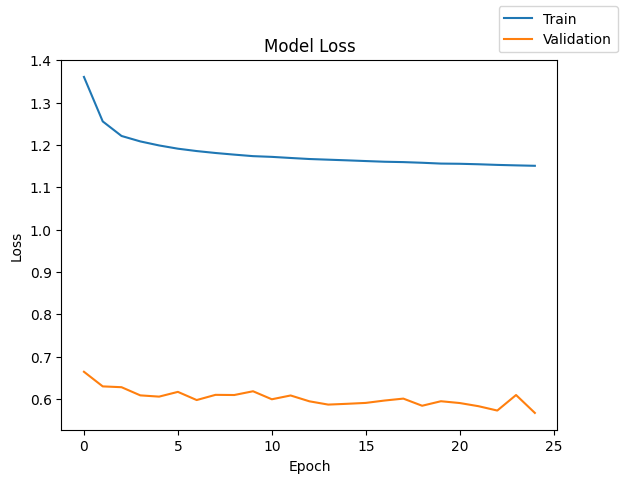

In [ ]:
plot(history,'loss')

In [ ]:
model_1_trainperf = model_performance_classification(model, X_train, y_train)
model_1_trainperf

384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.73279,0.73279,0.772789,0.745626


In [ ]:
model_1_valid_perf = model_performance_classification(model, X_val, y_val)
model_1_valid_perf

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.721135,0.721135,0.760478,0.73424


### Model-2

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model2 = Sequential()

In [ ]:
model2.add(Dense(14,activation='relu',input_dim=X_train.shape[1]))
model2.add(Dense(7,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
model2.compile(loss='binary_crossentropy',optimizer=optimizer)

In [ ]:
history = model2.fit(
    X_train,
    y_train,
    validation_data=(X_val,y_val),
    batch_size=64,
    epochs=25,
    class_weight=cw_dict
)

Epoch 1/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.3021 - val_loss: 0.6618
Epoch 2/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1691 - val_loss: 0.6414
Epoch 3/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1606 - val_loss: 0.5808
Epoch 4/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1415 - val_loss: 0.5798
Epoch 5/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1411 - val_loss: 0.5689
Epoch 6/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1377 - val_loss: 0.6331
Epoch 7/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1309 - val_loss: 0.5759
Epoch 8/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1044 - val_loss: 0.6059
Epoch 9/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1266 - val_loss: 0.6583
Epoch 10/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1197 - val_loss: 0.5853
Epoch 11/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1139 - val_loss: 0.5830
Epoch 12/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

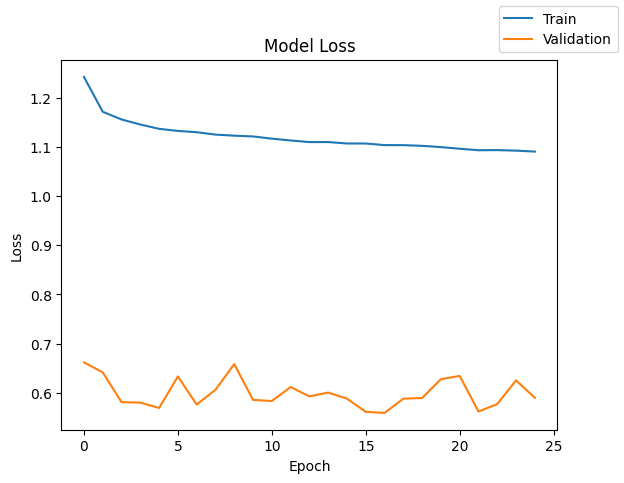

In [ ]:
plot(history,'loss')

In [ ]:
model2_trainperf = model_performance_classification(model2,X_train,y_train)
model2_trainperf

384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.751713,0.751713,0.793762,0.764189


In [ ]:
model2_valperf = model_performance_classification(model2,X_val,y_val)
model2_valperf

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.71559,0.71559,0.760165,0.729889


### Model-3




In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model3 = Sequential()

In [ ]:
model3.add(Dense(14,activation='relu',input_dim=X_train.shape[1]))
model3.add(Dense(7,activation='relu'))
model3.add(Dense(1,activation='sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.Adam()
model3.compile(loss='binary_crossentropy',optimizer=optimizer)

In [ ]:
history = model3.fit(
    X_train,
    y_train,
    validation_data=(X_val,y_val),
    batch_size=64,
    epochs=25,
    class_weight=cw_dict
)

Epoch 1/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0830 - val_loss: 0.5776
Epoch 2/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0847 - val_loss: 0.5871
Epoch 3/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0922 - val_loss: 0.5950
Epoch 4/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0896 - val_loss: 0.6039
Epoch 5/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0848 - val_loss: 0.5977
Epoch 6/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0774 - val_loss: 0.6051
Epoch 7/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0916 - val_loss: 0.5844
Epoch 8/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0937 - val_loss: 0.6097
Epoch 9/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.0837 - val_loss: 0.5838
Epoch 10/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0740 - val_loss: 0.5954
Epoch 11/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1006 - val_loss: 0.5800
Epoch 12/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/ste

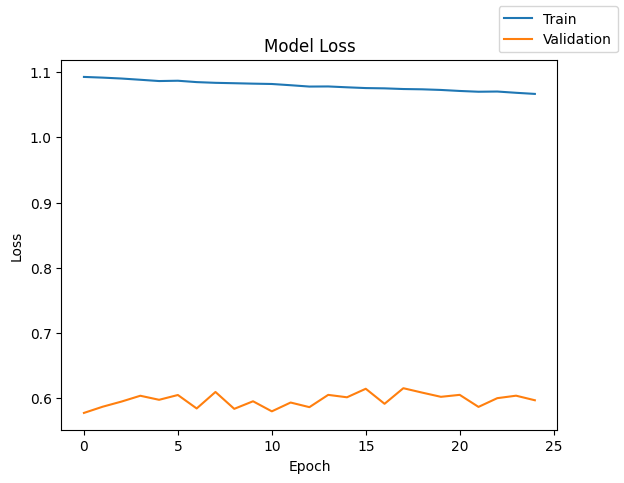

In [ ]:
plot(history,'loss')

In [ ]:
model3_trainperf = model_performance_classification(model3,X_train,y_train)
model3_trainperf

384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.748777,0.748777,0.795092,0.762017


In [ ]:
model3_valperf = model_performance_classification(model3,X_val,y_val)
model3_valperf

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.712003,0.712003,0.762123,0.727382


### Model-4

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model4 = Sequential()

In [ ]:
model4.add(Dense(14,activation='relu',input_dim=X_train.shape[1]))
model4.add(Dropout(0.4))
model4.add(Dense(7,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(1,activation='sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.Adam()
model4.compile(loss='binary_crossentropy',optimizer=optimizer)

In [ ]:
history = model4.fit(
    X_train,
    y_train,
    validation_data=(X_val,y_val),
    batch_size=64,
    epochs=25,
    class_weight=cw_dict
)

Epoch 1/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.3493 - val_loss: 0.6553
Epoch 2/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2613 - val_loss: 0.6210
Epoch 3/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2440 - val_loss: 0.6150
Epoch 4/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2450 - val_loss: 0.6149
Epoch 5/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2253 - val_loss: 0.6032
Epoch 6/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2127 - val_loss: 0.6046
Epoch 7/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2134 - val_loss: 0.5950
Epoch 8/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2031 - val_loss: 0.5971
Epoch 9/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1785 - val_loss: 0.5956
Epoch 10/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1709 - val_loss: 0.6106
Epoch 11/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1780 - val_loss: 0.6008
Epoch 12/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

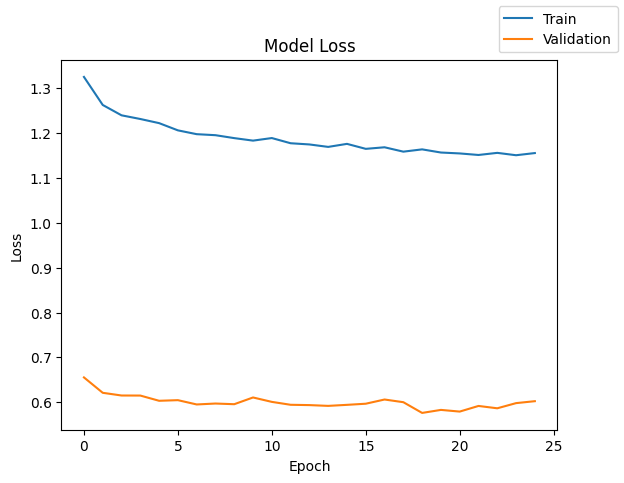

In [ ]:
plot(history,'loss')

In [ ]:
model4_trainperf = model_performance_classification(model4,X_train,y_train)
model4_trainperf

384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.721452,0.721452,0.791422,0.738695


In [ ]:
model4_valperf = model_performance_classification(model4,X_val,y_val)
model4_valperf

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.69439,0.69439,0.768779,0.713532


### Model-5

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model5 = Sequential()

In [ ]:
model5.add(Dense(14,activation='relu',input_dim=X_train.shape[1]))
model5.add(BatchNormalization())
model5.add(Dropout(0.4))
model5.add(Dense(7,activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(Dense(1,activation='sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.Adam()
model5.compile(loss='binary_crossentropy',optimizer=optimizer)

In [ ]:
history = model5.fit(
  X_train,
  y_train,
  validation_data=(X_val,y_val),
  batch_size=64,
  epochs=30,
  class_weight=cw_dict
)

Epoch 1/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1229 - val_loss: 0.5821
Epoch 2/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.1617 - val_loss: 0.5846
Epoch 3/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1550 - val_loss: 0.5953
Epoch 4/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1340 - val_loss: 0.5881
Epoch 5/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1381 - val_loss: 0.5826
Epoch 6/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.1508 - val_loss: 0.5814
Epoch 7/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1442 - val_loss: 0.5886
Epoch 8/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1226 - val_loss: 0.5889
Epoch 9/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1558 - val_loss: 0.5858
Epoch 10/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1434 - val_loss: 0.5933
Epoch 11/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1446 - val_loss: 0.5822
Epoch 12/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

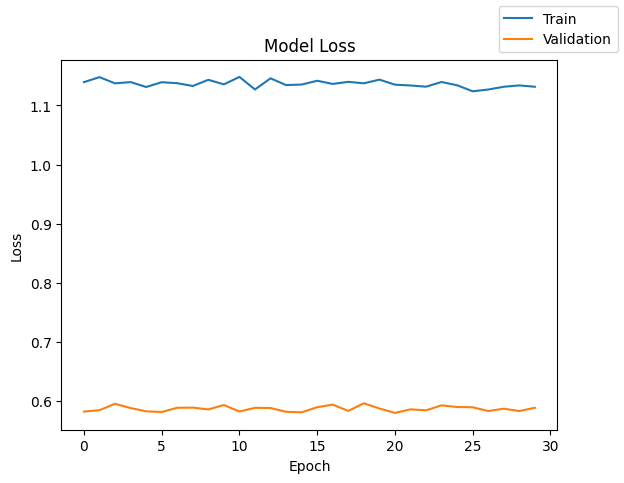

In [ ]:
plot(history,'loss')

In [ ]:
model5_trainperf = model_performance_classification(model5,X_train,y_train)
model5_trainperf

384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.74633,0.74633,0.795352,0.760053


In [ ]:
model5_valperf = model_performance_classification(model5,X_val,y_val)
model5_valperf

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.707436,0.707436,0.760028,0.723397


### Model-6

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model6 = Sequential()

In [ ]:
model6.add(Dense(14,activation='relu',input_dim=X_train.shape[1]))
model6.add(BatchNormalization())
model6.add(Dense(7,activation='relu'))
model6.add(BatchNormalization())
model6.add(Dense(1,activation='sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.Adam()
model6.compile(loss='binary_crossentropy',optimizer=optimizer)

In [ ]:
history = model6.fit(
    X_train,
    y_train,
    validation_data=(X_val,y_val),
    batch_size=64,
    epochs=25,
    class_weight=cw_dict
)

Epoch 1/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.6359 - val_loss: 0.5828
Epoch 2/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2313 - val_loss: 0.6030
Epoch 3/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1961 - val_loss: 0.6127
Epoch 4/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1607 - val_loss: 0.5985
Epoch 5/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1638 - val_loss: 0.5922
Epoch 6/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1366 - val_loss: 0.5916
Epoch 7/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1223 - val_loss: 0.5966
Epoch 8/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1384 - val_loss: 0.5923
Epoch 9/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1210 - val_loss: 0.5938
Epoch 10/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1244 - val_loss: 0.6002
Epoch 11/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1076 - val_loss: 0.5987
Epoch 12/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

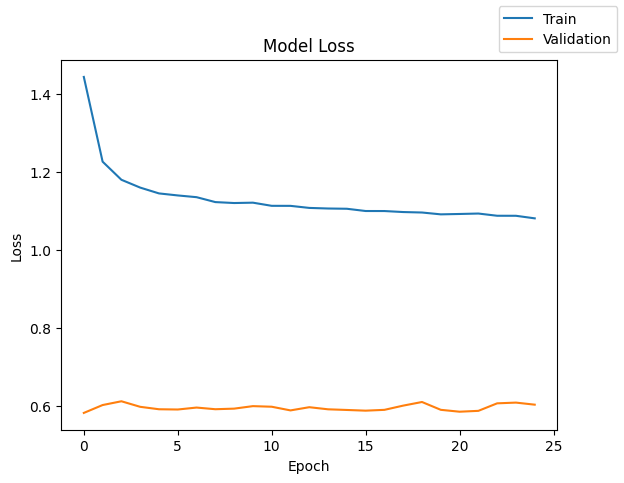

In [ ]:
plot(history,'loss')

In [ ]:
model6_trainperf = model_performance_classification(model6,X_train,y_train)
model6_trainperf

384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.728548,0.728548,0.796235,0.745199


In [ ]:
model6_valperf = model_performance_classification(model6,X_val,y_val)
model6_valperf

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.692433,0.692433,0.759496,0.710992


### Model-7

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model7  = Sequential()

In [ ]:
model7.add(Dense(14,activation='relu',input_dim=X_train.shape[1],kernel_initializer='he_normal'))
model7.add(Dropout(0.4))
model7.add(Dense(7,activation='relu',kernel_initializer='he_normal'))
model7.add(Dropout(0.2))
model7.add(Dense(1,activation='sigmoid',kernel_initializer='he_normal'))

In [ ]:
optimizer = tf.keras.optimizers.Adam()
model7.compile(loss='binary_crossentropy',optimizer=optimizer)

In [ ]:
history = model7.fit(
    X_train,
    y_train,
    validation_data=(X_val,y_val),
    epochs=25,
    batch_size=64,
    class_weight=cw_dict
)

Epoch 1/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.5751 - val_loss: 0.7002
Epoch 2/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3771 - val_loss: 0.6736
Epoch 3/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3528 - val_loss: 0.6535
Epoch 4/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3104 - val_loss: 0.6215
Epoch 5/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2721 - val_loss: 0.6326
Epoch 6/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2215 - val_loss: 0.6353
Epoch 7/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2513 - val_loss: 0.6191
Epoch 8/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2399 - val_loss: 0.6172
Epoch 9/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2251 - val_loss: 0.6173
Epoch 10/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2310 - val_loss: 0.6144
Epoch 11/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2246 - val_loss: 0.6069
Epoch 12/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

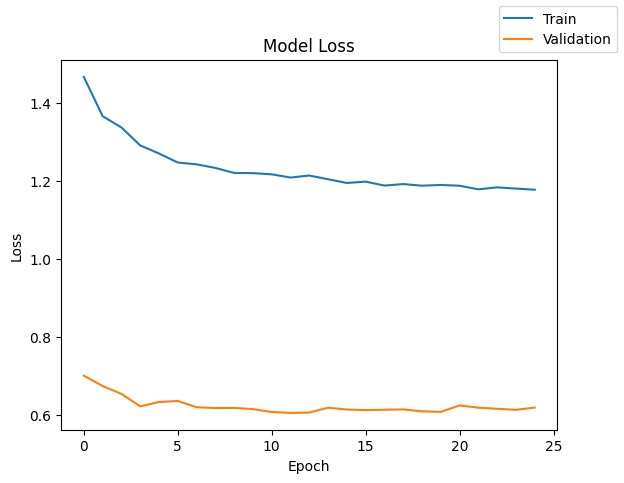

In [ ]:
plot(history,'loss')

In [ ]:
model7_trainperf = model_performance_classification(model7,X_train,y_train)
model7_trainperf

384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.700082,0.700082,0.777316,0.71913


In [ ]:
model7_valperf = model_performance_classification(model7,X_val,y_val)
model7_valperf

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.683627,0.683627,0.761919,0.70371


### Model-8

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model8 = Sequential()

In [ ]:
model8.add(Dense(200,activation='relu',input_dim=X_train.shape[1],kernel_initializer='he_normal'))
model8.add(Dropout(0.8))
model8.add(Dense(180,activation='relu',kernel_initializer='he_normal'))
model8.add(Dropout(0.6))
model8.add(Dense(160,activation='relu',kernel_initializer='he_normal'))
model8.add(Dropout(0.4))
model8.add(Dense(140,activation='relu',kernel_initializer='he_normal'))
model8.add(Dropout(0.4))
model8.add(Dense(120,activation='relu',kernel_initializer='he_normal'))
model8.add(Dropout(0.4))
model8.add(Dense(100,activation='relu',kernel_initializer='he_normal'))
model8.add(Dropout(0.2))
model8.add(Dense(80,activation='relu',kernel_initializer='he_normal'))
model8.add(Dropout(0.2))
model8.add(Dense(60,activation='relu',kernel_initializer='he_normal'))
model8.add(Dropout(0.2))
model8.add(Dense(40,activation='relu',kernel_initializer='he_normal'))
model8.add(Dropout(0.2))
model8.add(Dense(20,activation='relu',kernel_initializer='he_normal'))
model8.add(Dropout(0.2))
model8.add(Dense(1,activation='sigmoid',kernel_initializer='he_normal'))

In [ ]:
optimizer = tf.keras.optimizers.Adam()
model8.compile(loss='binary_crossentropy',optimizer=optimizer)

In [ ]:
history = model8.fit(
    X_train,
    y_train,
    validation_data=(X_val,y_val),
    batch_size=64,
    epochs=50,
    class_weight=cw_dict
)

Epoch 1/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 1.8550 - val_loss: 0.7001
Epoch 2/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.3812 - val_loss: 0.6971
Epoch 3/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.3990 - val_loss: 0.6924
Epoch 4/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.3989 - val_loss: 0.6916
Epoch 5/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.3892 - val_loss: 0.6884
Epoch 6/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.3875 - val_loss: 0.6868
Epoch 7/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.3827 - val_loss: 0.6839
Epoch 8/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.3767 - val_loss: 0.6784
Epoch 9/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.3794 - val_loss: 0.6686
Epoch 10/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.3740 - val_loss: 0.6564
Epoch 11/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.3464 - val_loss: 0.6411
Epoch 12/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/s

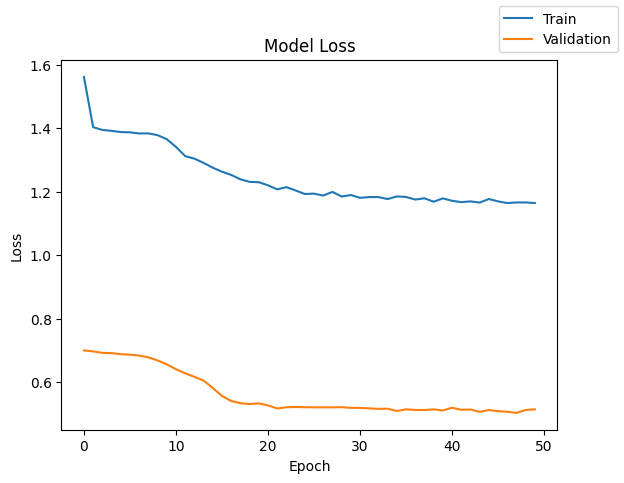

In [ ]:
plot(history,'loss')

In [ ]:
model8_trainperf = model_performance_classification(model8,X_train,y_train)
model8_trainperf

384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7677,0.7677,0.787822,0.775141


In [ ]:
model8_valperf = model_performance_classification(model8,X_val,y_val)
model8_valperf

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.736464,0.736464,0.759774,0.745346


## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_1_trainperf.T,
        model2_trainperf.T,
        model3_trainperf.T,
        model4_trainperf.T,
        model5_trainperf.T,
        model6_trainperf.T,
        model7_trainperf.T,
        model8_trainperf.T,

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization,More Layers)",

]

In [ ]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_1_valid_perf.T,
        model2_valperf.T,
        model3_valperf.T,
        model4_valperf.T,
        model5_valperf.T,
        model6_valperf.T,
        model7_valperf.T,
        model8_valperf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization,More Layers)",
]

In [ ]:
models_train_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (SGD with Momentum, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (Adam, Batch Normalization)","Neural Network (dropout [0.4,0.2], Batch Normalization)","Neural Network (Adam,dropout [0.4,0.2] ,He initialization)","Neural Network (Adam,dropout [0.4,0.2] ,He initialization,More Layers)"
Accuracy,0.732790,0.751713,0.748777,0.721452,0.746330,0.728548,0.700082,0.767700
Recall,0.732790,0.751713,0.748777,0.721452,0.746330,0.728548,0.700082,0.767700
Precision,0.772789,0.793762,0.795092,0.791422,0.795352,0.796235,0.777316,0.787822
F1 Score,0.745626,0.764189,0.762017,0.738695,0.760053,0.745199,0.719130,0.775141


In [ ]:
models_valid_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (SGD with Momentum, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (Adam, Batch Normalization)","Neural Network (dropout [0.4,0.2], Batch Normalization)","Neural Network (Adam,dropout [0.4,0.2] ,He initialization)","Neural Network (Adam,dropout [0.4,0.2] ,He initialization,More Layers)"
Accuracy,0.721135,0.715590,0.712003,0.694390,0.707436,0.692433,0.683627,0.736464
Recall,0.721135,0.715590,0.712003,0.694390,0.707436,0.692433,0.683627,0.736464
Precision,0.760478,0.760165,0.762123,0.768779,0.760028,0.759496,0.761919,0.759774
F1 Score,0.734240,0.729889,0.727382,0.713532,0.723397,0.710992,0.703710,0.745346


In [ ]:
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]

,F1 Score
"Neural Network (SGD, No Regularization)",0.011385
"Neural Network (SGD with Momentum, No Regularization)",0.034300
"Neural Network (Adam , No Regularization)",0.034634
"Neural Network (Adam, dropout [0.4,0.2])",0.025162
"Neural Network (Adam, Batch Normalization)",0.036656
"Neural Network (dropout [0.4,0.2], Batch Normalization)",0.034207
"Neural Network (Adam,dropout [0.4,0.2] ,He initialization)",0.015420
"Neural Network (Adam,dropout [0.4,0.2] ,He initialization,More Layers)",0.029796
